/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp


1000000
Total Brightness = 1.79992502736e+19 Temperature = 1000000.0
Total Brightness =  179992502736.0 Temperature = 10000.0
Total Brightness =  1.79992502736e+27 Temperature = 100000000.0
Total Brightness (via alternate method) = 1.7999250273578349e+19
The analytical solution for T=1E6 K is: total brightness 1.7999250273578353e+19
The analytical solution for T=1000 K is: total brightness 179992502735.78357
The analytical solution for T=1E8 K is: total brightness 1.7999250273578354e+27
Units for total brightness are: erg/s/cm**2/ster; Units for temperature are: K


/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


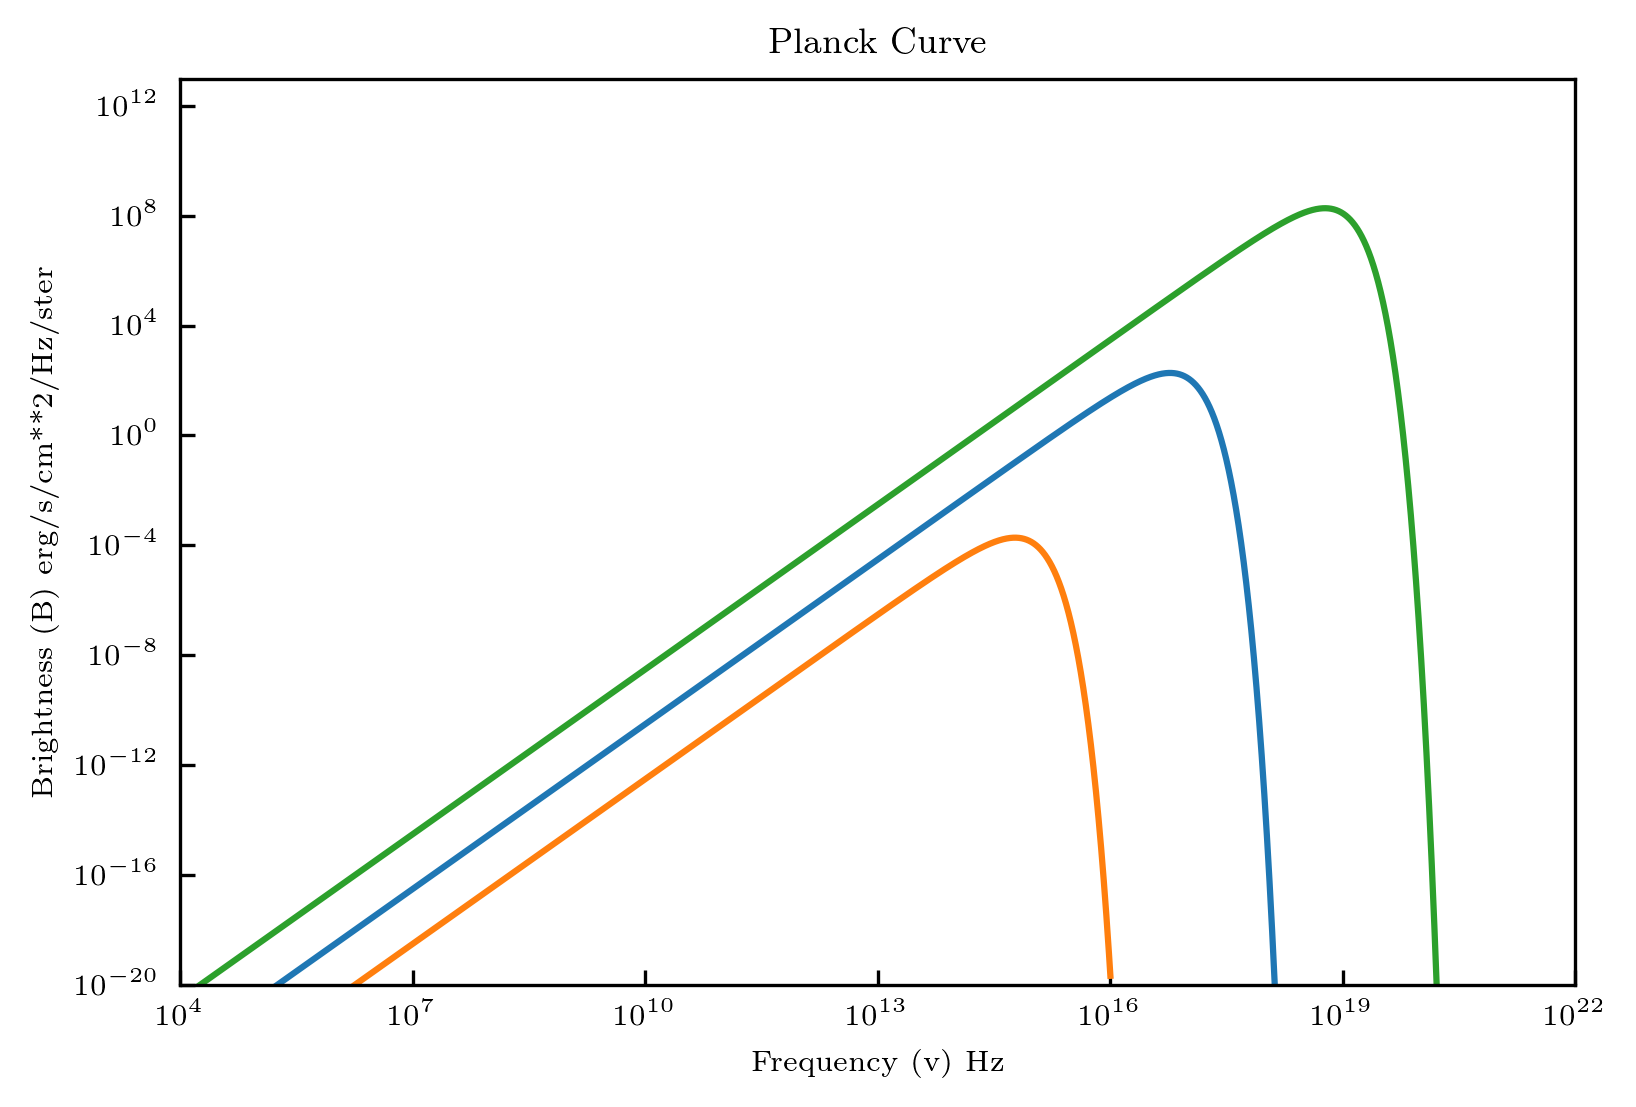

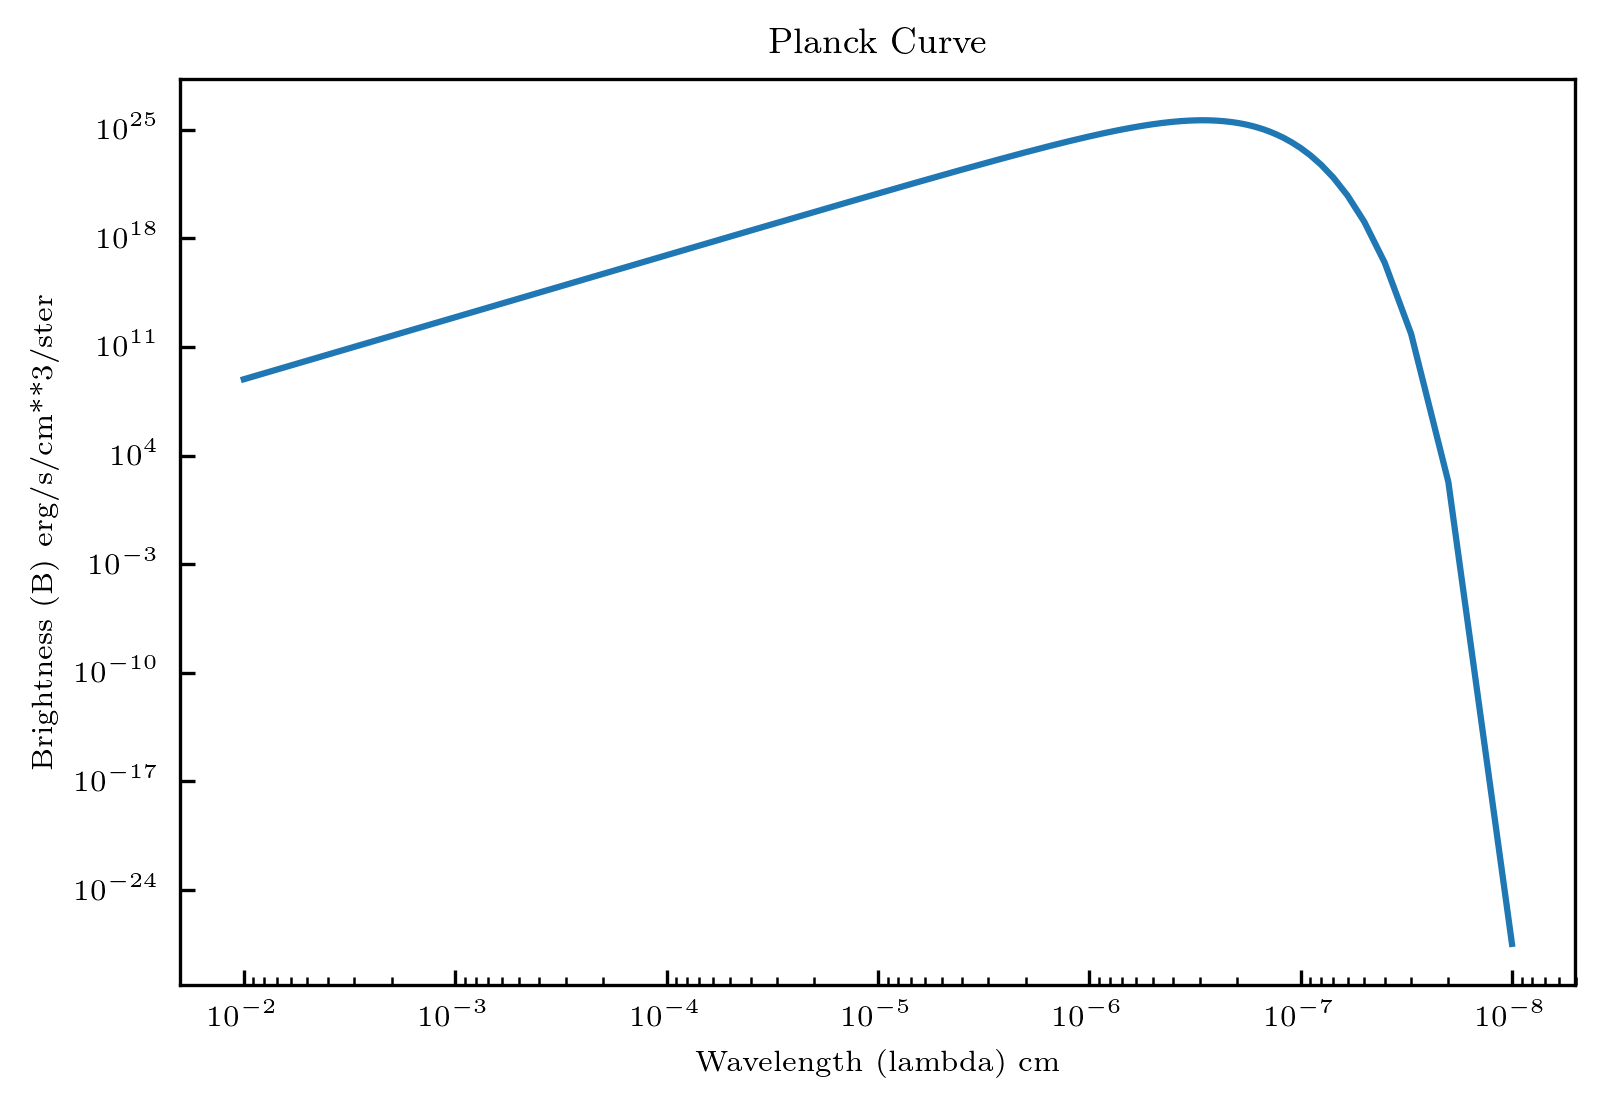

In [20]:
#Problem Set 1 --- Maggie Thompson ---- January, 2018

import numpy as np
import math  as math
import matplotlib.pyplot as plt
import matplotlib
import scipy.integrate as integrate

%matplotlib inline 
from classcode.plot_utils import plot_pretty
plot_pretty(dpi=300) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)

#Problem 3: Planck Curve Numerics

#3.1: Write an original code to integrate the Planck curve to find total brightness B(T)

#First let's define some constants:

c=3.00E10 #speed of light, cm/s
h = 6.625E-27 #Planck's constant (erg*s)
k =1.38E-16 #Boltzmann's constant (erg/K)

#Define the Planck function:

#B in terms of frequency (v):

Temp = 1e6 #Kelvin
Temp2 = 1e4 #Kelvin
Temp3 = 1e8

#freq = np.linspace(1e4, 1e20, 1e6) #array of frequencies, following range plotted in Fig 1.11
freq = np.linspace(1e4, 1e20, 1e6)
freq2 = np.linspace(1e4, 1e16, 1e6)
freq3 = np.linspace(1e4, 1e21, 1e6)

lamb = np.linspace(1e-2, 1e-8, 1e6)
#lamb=np.linspace(1e6, 1e-10, 1e6)
#print(lamb)

print(len(freq))
def B_v(v, T):
    #v: frequency (Hz), an array of values
    #T: Temperature (K)
    top = (2.*h*(v**3.))/(c**2.)
    bottom = (np.exp((h*v)/(k*T))) - 1.
    B= top/bottom
    return B #this will be an array, with units of erg*s^-1*cm^-2*ster^-1*Hz^-1

#B in terms of wavelength (l):
def B_l(l, T):
    #l: wavelength (cm), an array of values
    #T: Temperature (K)
    top = (2*h*(c**2.))/(l**5.)
    #top = (2*h*(c**2.))/((l*1e8)*(l**4.)) #how to we get the per Angstrom? Do we need that?
    bottom = ((np.exp((h*c)/(l*k*T))) - 1.)
    B=top/bottom
    return B #this will be an array, with units of erg*s^-1*ster^-1*cm^-2 * Angstrom^-1

#Integrate the Planck function:

#let's use the Numpy function trapz to integrate the Planck function over frequency
#Note: the Numpy "trapz" function integrates along a given axis via the composite trapezoidal rule 

tot_brightness = np.trapz(B_v(freq, Temp), freq)
tot_brightness2 = np.trapz(B_v(freq2, Temp2), freq2)
tot_brightness3 = np.trapz(B_v(freq3, Temp3), freq3)

print('Total Brightness =', tot_brightness, 'Temperature =', Temp)
print('Total Brightness = ', tot_brightness2, 'Temperature =', Temp2)
print('Total Brightness = ', tot_brightness3, 'Temperature =', Temp3)

#Let's try a different integration method to compare to the trapezoidal method. We'll use the scipy.integrate.quad technique
#which uses a technique from the Fortran library QUADPACK

B = lambda v: ((2.*h*(v**3.))/(c**2.))/((np.exp((h*v)/(k*Temp))) - 1.)
integrate = integrate.quad(B, 0.1, 1e21)

print('Total Brightness (via alternate method) =', integrate[0])


#Let's compare our total brightness values to the analytic solutions:

def Bv_analyt(T):
    top = 2*(np.pi**4)*(k**4)*(T**4)
    bottom = (15 * (h**3)*(c**2))
    B=top/bottom
    return B


print('The analytical solution for T=1E6 K is: total brightness', Bv_analyt(Temp))
print('The analytical solution for T=1000 K is: total brightness', Bv_analyt(Temp2))
print('The analytical solution for T=1E8 K is: total brightness', Bv_analyt(Temp3))
print('Units for total brightness are: erg/s/cm**2/ster; Units for temperature are: K')


plt.plot(freq, B_v(freq, Temp))
plt.plot(freq2, B_v(freq2, Temp2))
plt.plot(freq3, B_v(freq3, Temp3))
plt.xlim(1e4, 1e22)
plt.ylim(1e-20, 1e13)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (v) Hz')
plt.ylabel('Brightness (B) erg/s/cm**2/Hz/ster')
plt.title('Planck Curve')
plt.show()

plt.plot(lamb, B_l(lamb, Temp))
#plt.xlim(1e-1, 1e-7)
#plt.ylim(1e-10, 1e14)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Wavelength (lambda) cm')
plt.ylabel('Brightness (B) erg/s/cm**3/ster')
plt.title('Planck Curve')
plt.show()

/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp


Peak of Planck Curve = 189.138525831 erg/s/cm**2/Hz/ster
Location of Peak of Planck Curve= 5.88000588001e+16 Hz
X = hv/kT = 2.82282890979


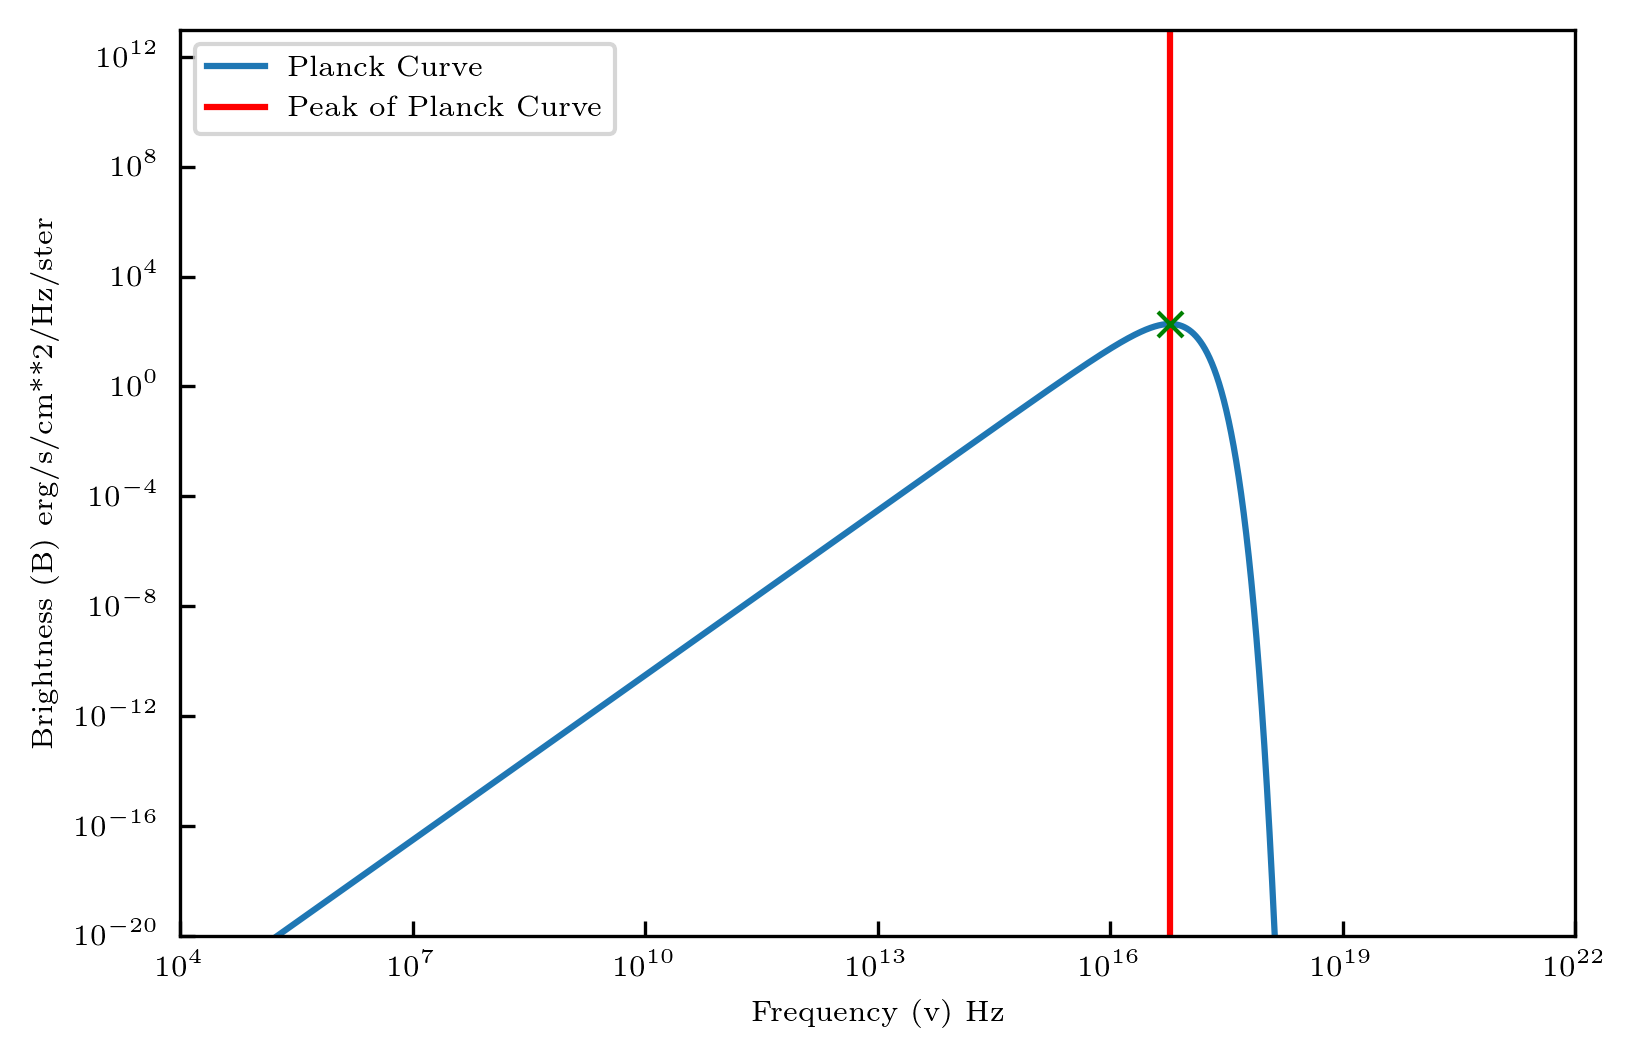

Peak of Planck Curve= 4.08021780719e+25 erg/s/cm**3/ster
Location of Peak of Planck Curve = 2.9e-07 cm
Y = hc/lkT = 4.96626686657


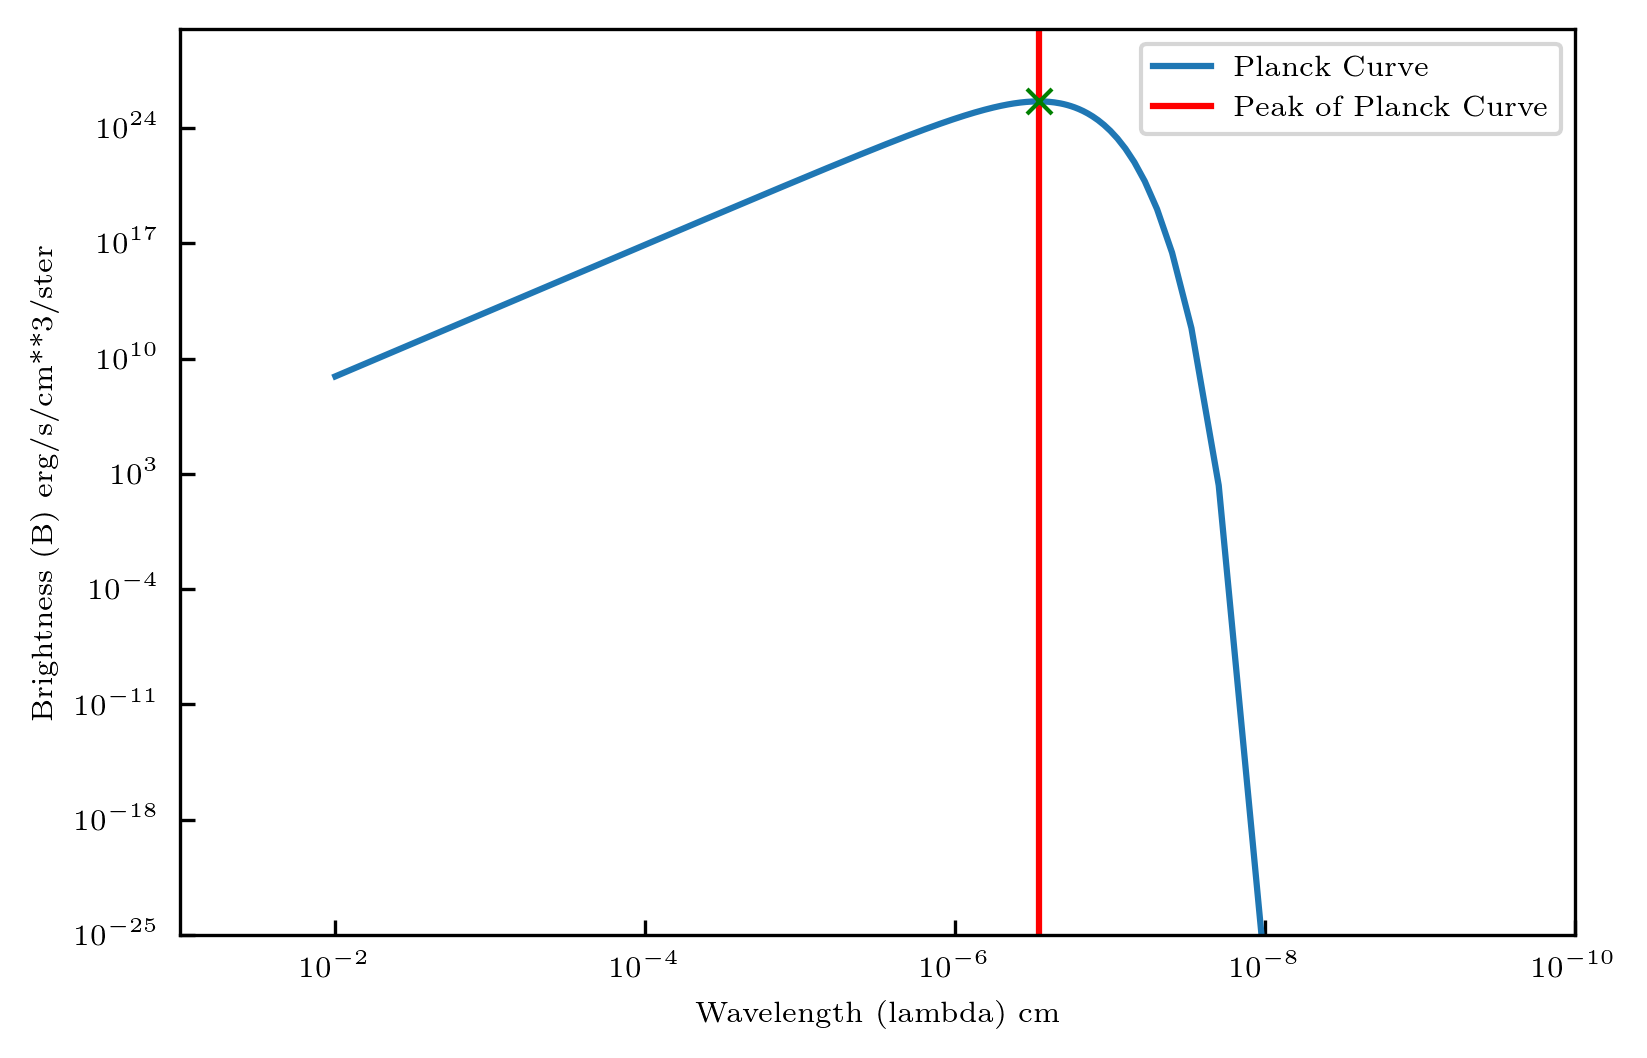

In [34]:
#3.2: Write an original code to find the numerical value of the peak of the Planck curve Bv(v,T) in terms of multiples of x=hv/kT
#     Repeat for Planck curve Bl(l,T) and the variable y = hc/lkT

Bv = B_v(freq, Temp)
Bl = B_l(lamb, Temp)

#Let's define a function to compute the peak of the Planck curve:

def peak_Bv(B, v, T):
    peak = np.argmax(B)
    B_peak = np.amax(B)
    peak_v = v[peak]
    constant = h/(k*T)
    #return {'Peak of Planck Curve': peak_v, 'X': peak_v*constant}
    return((peak_v, peak_v*constant, B_peak))

peakv = peak_Bv(Bv, freq, Temp)
print('Peak of Planck Curve =', peakv[2], 'erg/s/cm**2/Hz/ster')
print('Location of Peak of Planck Curve=', peakv[0], 'Hz')
print('X = hv/kT =', peakv[1])

plt.plot(freq, B_v(freq, Temp), label='Planck Curve')
plt.axvline(peakv[0], color='r', label='Peak of Planck Curve')
plt.plot(peakv[0], peakv[2], 'x', color='g')
plt.xlim(1e4, 1e22)
plt.ylim(1e-20, 1e13)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (v) Hz')
plt.ylabel('Brightness (B) erg/s/cm**2/Hz/ster')
plt.legend()
plt.show()

def peak_Bl(B, l, T):
    peak = np.argmax(B)
    B_peak = np.amax(B)
    peak_l = l[peak]
    constant = (h*c)/(k*T)
    #return {'Peak of Planck Curve': peak_l, 'Y': peak_l/constant}
    return((peak_l, constant/peak_l, B_peak))

peakl = peak_Bl(Bl, lamb, Temp)
print('Peak of Planck Curve=', peakl[2], 'erg/s/cm**3/ster')
print('Location of Peak of Planck Curve =', peakl[0], 'cm')
print('Y = hc/lkT =', peakl[1])

plt.plot(lamb, B_l(lamb, Temp), label='Planck Curve')
plt.axvline(peakl[0], color='r', label='Peak of Planck Curve')
plt.plot(peakl[0], peakl[2], 'x', color='g')
plt.xlim(1e-1, 1e-10)
plt.ylim(1e-25, 1e30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (lambda) cm')
plt.ylabel('Brightness (B) erg/s/cm**3/ster')
plt.legend()
plt.show()


/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/maggiethompson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Location of the peak of the derivative of the Planck curve = 7.98000798001e+16 Hz
Peak of the derivative of the Planck curve = 0.000649478224302
x = hv/kT = 3.83098209185


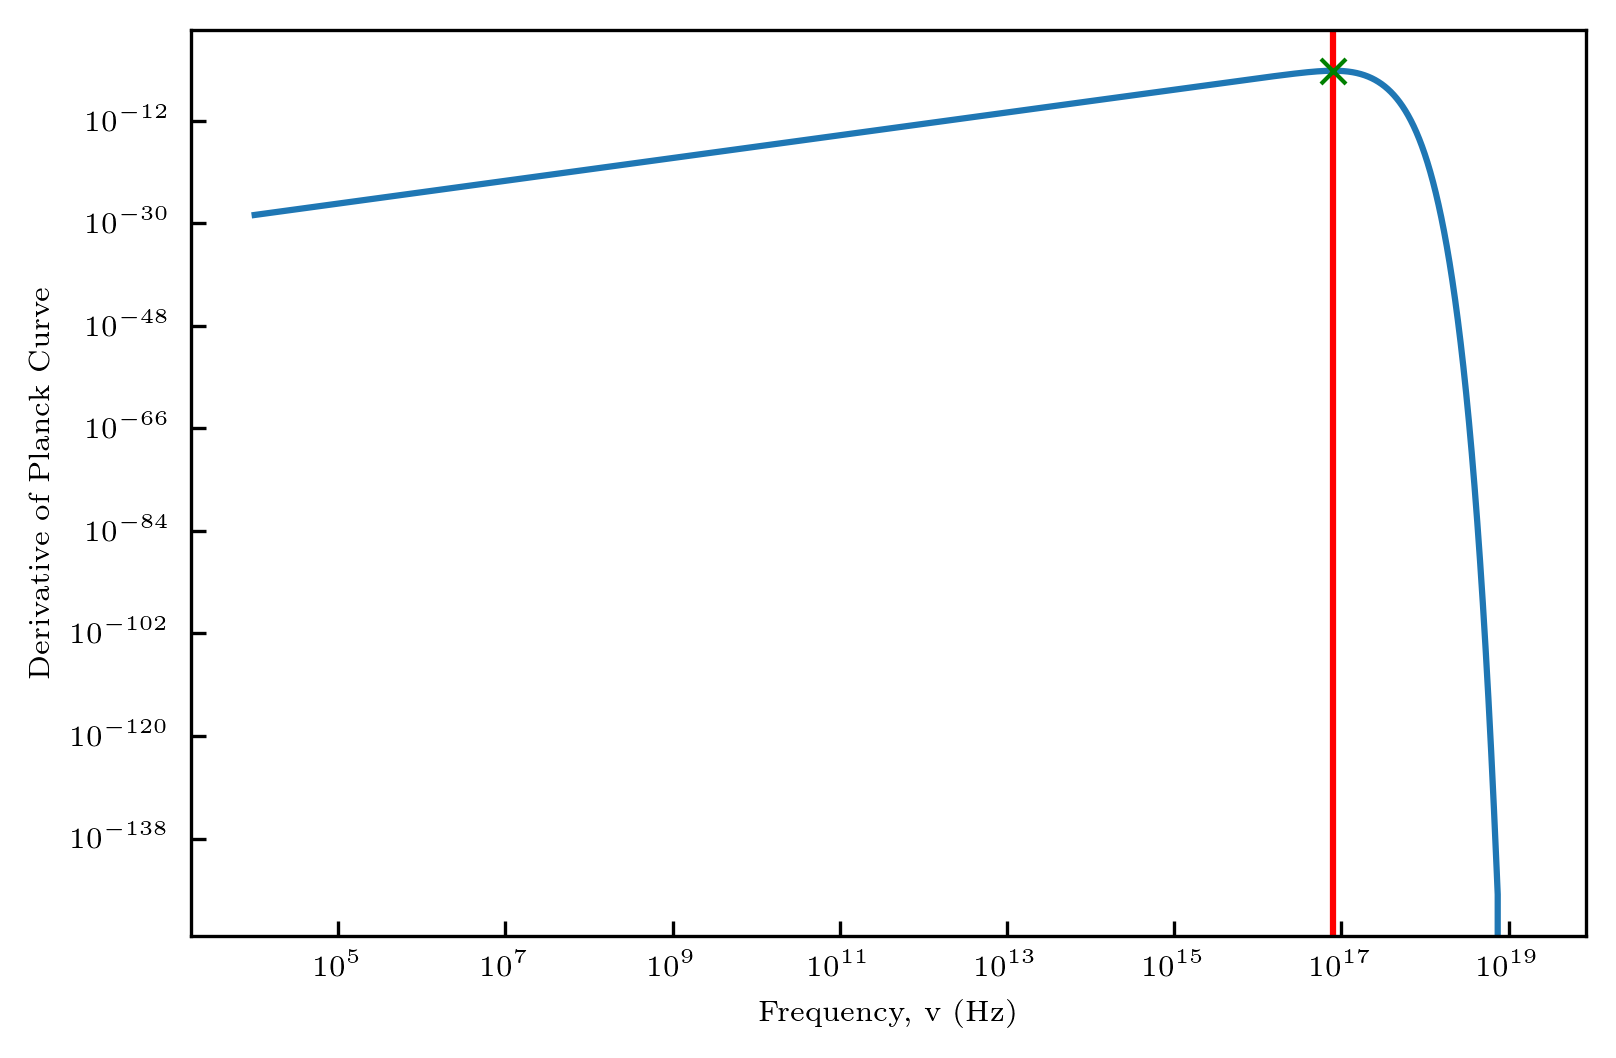

In [32]:
#3.3 - Write an original code to find the numerical value of the peak of the derivative of the Planck curve partial(B)/partial(T) 
#      with respect to T in terms of multiples of x = hv/kT

#Using equation 1.55 for partial(B)/partial(T), we define the function to take the derivative of the Planck curve with respect to temperature:

def deriv(v, T):
    term1 = (2*(h**2)*(v**4))/((c**2)*k*(T**2))
    term2 = (np.exp((h*v)/(k*T)))/((np.exp((h*v)/(k*T)) - 1) **2)
    deriv = term1 * term2
    return deriv

#print(deriv(freq, Temp))


def peak_deriv(D, v, T):
    peak_deriv = np.amax(D)
    peak = np.argmax(D)
    peak_v = v[peak]
    constant = h/(k*T)
    #return {'Peak of Planck Curve': peak_v, 'X': peak_v*constant}
    return((peak_v, peak_v*constant, peak_deriv))

derivative = deriv(freq, Temp)
#print(derivative) #there are some nan values which we want to exclude from our calculation to find the peak of the derivative
no_nan = np.where(~np.isnan(derivative))

peakderiv= peak_deriv(derivative[no_nan], freq[no_nan], Temp)
print('Location of the peak of the derivative of the Planck curve =', peakderiv[0], 'Hz')
print('Peak of the derivative of the Planck curve =', peakderiv[2])
print('x = hv/kT =', peakderiv[1])


plt.plot(freq[no_nan], deriv(freq[no_nan],Temp))
plt.axvline(peakderiv[0], color='r')
plt.plot(peakderiv[0], peakderiv[2], 'x', color='g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency, v (Hz)')
plt.ylabel('Derivative of Planck Curve')
plt.show()